Preliminaries

In [2]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import time

Baseline Simple Linear Regression Model

This is our first baseline Simple Linear Regression Model, which uses the cleaned but unprocessed dataset. 

Regression Model: SalePrice = 82.2362686925065 * TotalLivingArea + -26894.90013254044
Mean Absolute Error: $32682.908468091653
Training Time: 0.002000570297241211 seconds


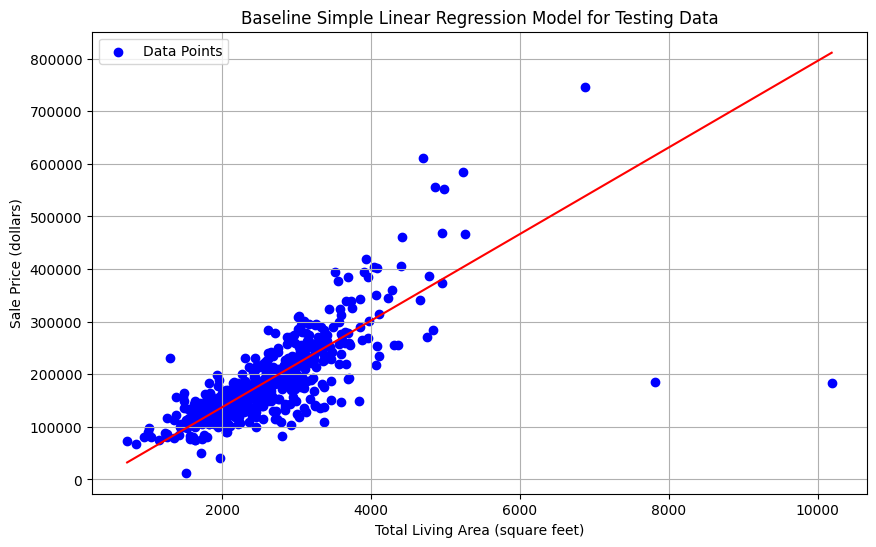

In [4]:
# Load the Ames dataset
file_path = '../data/AmesData.csv'
ames_df = pd.read_csv(file_path)

# Create a new independent variable for total living area
ames_df['TotalLivingArea'] = ames_df['GrLivArea'] + ames_df['TotalBsmtSF'].fillna(0)

# Split the dataset into a testing dataset and a training dataset
x = ames_df[['TotalLivingArea']]
y = ames_df['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# Build the model and measure the training time
model = LinearRegression()
start_time = time.time()
model.fit(x_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Make predictions, evaluate accuracy of the model, and print the results
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Regression Model: SalePrice = {model.coef_[0]} * TotalLivingArea + {model.intercept_}")
print(f"Mean Absolute Error: ${mae}")
print(f"Training Time: {training_time} seconds")

# Create scatterplots for the testing data
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='Data Points')

# Compute the line values
x_values = np.linspace(x_test.min(), x_test.max(), 100)
y_values = model.coef_[0] * x_values + model.intercept_

# Plot the line
plt.plot(x_values, y_values, color='red')

# Add labels and show the plot
plt.xlabel('Total Living Area (square feet)')
plt.ylabel('Sale Price (dollars)')
plt.title('Baseline Simple Linear Regression Model for Testing Data')
plt.legend()
plt.grid(True)
plt.show()
